In [29]:
## parameters  key and bpm have a least 20% infulence over the songs streams
# predict key and bpm regargding all the other parameters
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from datetime import date
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv("./MAIN_DATASET_spotify2023.csv")

encoder = LabelEncoder()
data["key"] = encoder.fit_transform(data["key"])
data["mode"] = encoder.fit_transform(data["mode"])
released_day_of_year = []

for i in range(len(data.index)):
    day_of_year = date(data['released_year'][i],
                    data['released_month'][i],
                    data['released_day'][i]).timetuple().tm_yday
    released_day_of_year.append(day_of_year)

# add new series to dataframe
data.insert(len(data.columns), "released_day_of_year", released_day_of_year, True)

data = data[["released_day_of_year", "streams",'bpm','key', 'mode', 'danceability_%', 'valence_%', 'energy_%','acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']]

for i in range(len(data)):
    data["streams"][i] = data["streams"][i] / 1e6

# data_standarized
data

,released_day_of_year,streams,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,195,141.381703,125,2,0,80,89,83,31,0,8,4
1,82,133.716286,92,3,0,71,61,74,7,0,10,4
2,181,140.003974,138,7,0,51,32,53,17,0,31,6
3,235,800.840817,170,0,0,55,58,72,11,0,11,15
4,138,303.236322,144,0,1,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...
947,307,91.473363,144,0,0,60,24,39,57,0,8,3
948,294,121.871870,166,8,0,42,7,24,83,1,12,6
949,307,73.513683,92,3,0,80,81,67,4,0,8,6
950,293,133.895612,97,3,0,82,67,77,8,0,12,5


Drop `bpm` and `key` columns from dataset; split the dataset.

In [30]:
data = data.drop(columns=['bpm', 'key'])
X = data.drop("streams", axis = 1)
y = data["streams"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_val, X_test, y_val, y_test = train_test_split(X_help, y_help, test_size=0.5, random_state=42)


#val_percent = (len(X_val)/(len(data)))*100
test_percent = (len(X_test)/(len(data)))*100
train_percent = (len(X_train)/(len(data)))*100
print(f"Percent of Train: {train_percent:.2f}  and Test dataset:{test_percent:.2f} ")
data

Percent of Train: 79.94  and Test dataset:20.06 


,released_day_of_year,streams,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,195,141.381703,0,80,89,83,31,0,8,4
1,82,133.716286,0,71,61,74,7,0,10,4
2,181,140.003974,0,51,32,53,17,0,31,6
3,235,800.840817,0,55,58,72,11,0,11,15
4,138,303.236322,1,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...
947,307,91.473363,0,60,24,39,57,0,8,3
948,294,121.871870,0,42,7,24,83,1,12,6
949,307,73.513683,0,80,81,67,4,0,8,6
950,293,133.895612,0,82,67,77,8,0,12,5


# Linear Regression - w/o `bpm`, `key`

In [31]:
reg = LinearRegression()
weights_train = np.ones_like(y_train)
np.random.seed(42)

reg.fit(X_train, y_train, sample_weight=weights_train)
y_pred_train = reg.predict(X_train)
y_pred = reg.predict(X_test)

rmse = np.sqrt(np.mean((y_pred - y_test)**2))
mean = mean_squared_error(y_test, y_pred)
print(f"Rmse val: {rmse}, Mean squared error val:  {mean}")

rmse = np.sqrt(np.mean((y_pred_train - y_train)**2))
mean = mean_squared_error(y_train, y_pred_train)
print(f"Rmse: {rmse}, Mean squared error train:  {mean}")

Rmse val: 496.9116253737426, Mean squared error val:  246921.1634315747
Rmse: 573.2162055717955, Mean squared error train:  328576.81833012693


# MLPRegressor - w/o `bpm`, `key`

In [32]:
reg = MLPRegressor(hidden_layer_sizes=(5, 6, 5), random_state=42, max_iter=100, solver='sgd')
reg.fit(X_train, y_train)
y_pred_train = reg.predict(X_train)
y_pred = reg.predict(X_val)

rmse = np.sqrt(np.mean((y_pred - y_val)**2))
mean = mean_squared_error(y_val, y_pred)
print(f"Rmse val: {rmse}, Mean squared error val:  {mean}")

rmse = np.sqrt(np.mean((y_pred_train - y_train)**2))
mean = mean_squared_error(y_train, y_pred_train)
print(f"Rmse: {rmse}, Mean squared error train:  {mean}")

Rmse val: 587.1715642573663, Mean squared error val:  344770.44587244245
Rmse: 585.3437242038697, Mean squared error train:  342627.2754648558


# Polynomial regressor - w/o `bpm`, `key`

In [33]:
poly_features = PolynomialFeatures(degree = 2)
X_train_poly = poly_features.fit_transform(X_train)
X_val_poly = poly_features.fit_transform(X_val)

reg = LinearRegression()
reg.fit(X_train_poly, y_train)

y_pred_train1 = reg.predict(X_train_poly)
y_val_train1 = reg.predict(X_val_poly)

rmse = np.sqrt(np.mean((y_val_train1 - y_val)**2))
mean = mean_squared_error(y_val, y_val_train1)
print(f"Rmse val: {rmse}, Mean squared error val:  {mean}")

rmse = np.sqrt(np.mean((y_pred_train1 - y_train)**2))
mean = mean_squared_error(y_train, y_pred_train1)
print(f"Rmse: {rmse}, Mean squared error train:  {mean}")

Rmse val: 571.9240073378865, Mean squared error val:  327097.07016942673
Rmse: 559.656240448481, Mean squared error train:  313215.1074729279


# SVM Regressor - w/o `bpm`, `key`

In [34]:
regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(X_train, y_train)

y_pred_train = regr.predict(X_train)
y_pred = regr.predict(X_val)

rmse = np.sqrt(np.mean((y_pred - y_val)**2))
mean = mean_squared_error(y_val, y_pred)
print(f"Rmse val: {rmse}, Mean squared error val:  {mean}")

rmse = np.sqrt(np.mean((y_pred_train - y_train)**2))
mean = mean_squared_error(y_train, y_pred_train)
print(f"Rmse: {rmse}, Mean squared error train:  {mean}")

Rmse val: 617.9138954836707, Mean squared error val:  381817.5822318047
Rmse: 625.7092512318243, Mean squared error train:  391512.06707709027


# k-fold cross-validation

In [35]:
from sklearn.model_selection import cross_val_score, cross_validate

# Linear Regression - w/o `bpm`, `key`; k-fold Cross-Validation

In [36]:
reg = LinearRegression()
for k in [3,5,10]:
    print(f"{k}-folds validation")
    scores = cross_val_score(reg, X_train, y_train, cv=k, scoring='neg_root_mean_squared_error')
    mean_cross = scores.mean()
    print(f"mean of {k}-folds cross_validation: {mean_cross}")
    print("----------")

print("5-folds cross_validate")
scores = cross_validate(reg, X_train, y_train, cv=5, scoring=['r2','neg_mean_absolute_error'],return_train_score=True)
print(f"\nr2: {scores['test_r2'].mean()}")
print(f"negative_mean_abs_error: {scores['test_neg_mean_absolute_error'].mean()}")


3-folds validation
mean of 3-folds cross_validation: -582.5294284543505
----------
5-folds validation
mean of 5-folds cross_validation: -580.145320602718
----------
10-folds validation
mean of 10-folds cross_validation: -577.3453364805077
----------
5-folds cross_validate

r2: -0.0008499859876477834
negative_mean_abs_error: -425.2237790423098


# MLPRegressor - w/o `bpm`, `key`; k-fold Cross-Validation

In [37]:
reg = MLPRegressor(hidden_layer_sizes=(5, 6, 5), random_state=42, max_iter=100, solver='sgd')
for k in [3,5,10]:
    print(f"{k}-folds validation")
    scores = cross_val_score(reg, X_train, y_train, cv=k, scoring='neg_root_mean_squared_error')
    mean_cross = scores.mean()
    print(f"mean of {k}-folds cross_validation: {mean_cross}")
    print("----------")

print("5-folds cross_validate")
scores = cross_validate(reg, X_train, y_train, cv=5, scoring=['r2','neg_mean_absolute_error'],return_train_score=True)
print(f"\nr2: {scores['test_r2'].mean()}")
print(f"negative_mean_abs_error: {scores['test_neg_mean_absolute_error'].mean()}")



3-folds validation
mean of 3-folds cross_validation: -588.7769130323164
----------
5-folds validation
mean of 5-folds cross_validation: -678.6830930818264
----------
10-folds validation
mean of 10-folds cross_validation: -588.0349317712866
----------
5-folds cross_validate

r2: -0.3672248310680235
negative_mean_abs_error: -398.1555059312507


# Polynomial regressor - w/o `bpm`, `key`; k-fold Cross-Validation

In [38]:
poly_features = PolynomialFeatures(degree = 2)
X_train_poly = poly_features.fit_transform(X_train)
X_val_poly = poly_features.fit_transform(X_val)
reg = LinearRegression()

for k in [3,5,10]:
    print(f"{k}-folds validation")
    scores = cross_val_score(reg, X_train, y_train, cv=k, scoring='neg_root_mean_squared_error')
    mean_cross = scores.mean()
    print(f"mean of {k}-folds cross_validation: {mean_cross}")
    print("----------")

print("5-folds cross_validate")
scores = cross_validate(reg, X_train, y_train, cv=5, scoring=['r2','neg_mean_absolute_error'],return_train_score=True)
print(f"\nr2: {scores['test_r2'].mean()}")
print(f"negative_mean_abs_error: {scores['test_neg_mean_absolute_error'].mean()}")



3-folds validation
mean of 3-folds cross_validation: -582.5294284543505
----------
5-folds validation
mean of 5-folds cross_validation: -580.145320602718
----------
10-folds validation
mean of 10-folds cross_validation: -577.3453364805077
----------
5-folds cross_validate

r2: -0.0008499859876477834
negative_mean_abs_error: -425.2237790423098


# SVM Regressor - w/o `bpm`, `key`; k-fold Cross-Validation

In [39]:
reg = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
for k in [3,5,10]:
    print(f"{k}-folds validation")
    scores = cross_val_score(reg, X_train, y_train, cv=k, scoring='neg_root_mean_squared_error')
    mean_cross = scores.mean()
    print(f"mean of {k}-folds cross_validation: {mean_cross}")
    print("----------")

print("5-folds cross_validate")
scores = cross_validate(reg, X_train, y_train, cv=5, scoring=['r2','neg_mean_absolute_error'],return_train_score=True)
print(f"\nr2: {scores['test_r2'].mean()}")
print(f"negative_mean_abs_error: {scores['test_neg_mean_absolute_error'].mean()}")


3-folds validation
mean of 3-folds cross_validation: -626.2722490578689
----------
5-folds validation
mean of 5-folds cross_validation: -624.560802273076
----------
10-folds validation
mean of 10-folds cross_validation: -621.270432014376
----------
5-folds cross_validate

r2: -0.15719615140631524
negative_mean_abs_error: -377.6321738529522


# Grid Search

In [40]:
from sklearn.model_selection import GridSearchCV
X_train, X_help, y_train, y_help = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression - w/o `bpm`, `key`; 5-fold Cross-Validation; Grid Search

In [41]:
# useless
reg = LinearRegression()
parameters = {}
grid_search = GridSearchCV(reg, parameters, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_estimator_)
print(grid_search.best_score_)

{}
LinearRegression()
-580.145320602718


# MLPRegressor - w/o `bpm`, `key`; k-fold Cross-Validation; Grid Search

In [42]:
reg = MLPRegressor(random_state=42)
parameters = {'max_iter' : [50,100,150,400,800],
              'solver':('lbfgs', 'sgd', 'adam'),
              'hidden_layer_sizes':[(10, 5, 5), (5, 10, 5), (5, 5, 10),(5,5), (5,10)]}

grid_search = GridSearchCV(reg, parameters, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_estimator_)
print(grid_search.best_score_)

{'hidden_layer_sizes': (10, 5, 5), 'max_iter': 50, 'solver': 'lbfgs'}
MLPRegressor(hidden_layer_sizes=(10, 5, 5), max_iter=50, random_state=42,
             solver='lbfgs')
-574.5316393884108


# SVM Regressor - w/o `bpm`, `key`; k-fold Cross-Validation; Grid Search

In [43]:
parameters = {'max_iter' : [50,100,150,400,800],
              'kernel':('linear', 'poly', 'rbf', 'sigmoid'),
              'C': [10**i for i in range(1, 8)],
              'epsilon': [0.1**i for i in range(1, 8)]}
reg = SVR()
grid_search = GridSearchCV(reg, parameters, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_estimator_)
print(grid_search.best_score_)

{'C': 10, 'epsilon': 0.1, 'kernel': 'rbf', 'max_iter': 100}
SVR(C=10, max_iter=100)
-581.9139086698899


# MLP - Grid Search hyperparameters

In [44]:
reg = MLPRegressor(random_state=42, hidden_layer_sizes= (10, 5, 5), max_iter= 50, solver= 'lbfgs')
reg.fit(X_train, y_train)

y_pred_train = reg.predict(X_train)
y_pred = reg.predict(X_help)

mae = mean_absolute_error(y_help, y_pred)
print("\nMean Absolute Error:", mae)

r2 = r2_score(y_help, y_pred)
print("\nR2:", r2)


Mean Absolute Error: 375.1205990030415

R2: -0.09726739351662417


## Linear Regression 

In [45]:
reg = LinearRegression()
weights_train = np.ones_like(y_train)
np.random.seed(42)

reg.fit(X_train, y_train, sample_weight=weights_train)
y_pred_train = reg.predict(X_train)
y_pred = reg.predict(X_help)

rmse = np.sqrt(np.mean((y_pred - y_help)**2))
mean = mean_squared_error(y_help, y_pred)
print(f"Rmse val: {rmse}, Mean squared error val:  {mean}")

rmse = np.sqrt(np.mean((y_pred_train - y_train)**2))
mean = mean_squared_error(y_train, y_pred_train)
print(f"Rmse: {rmse}, Mean squared error train:  {mean}")

mae = mean_absolute_error(y_help, y_pred)
print("\nMean Absolute Error:", mae)

r2 = r2_score(y_help, y_pred)
print("\nR2:", r2)

Rmse val: 496.9116253737426, Mean squared error val:  246921.1634315747
Rmse: 573.2162055717955, Mean squared error train:  328576.81833012693

Mean Absolute Error: 376.8122452244539

R2: -0.0086945221329493


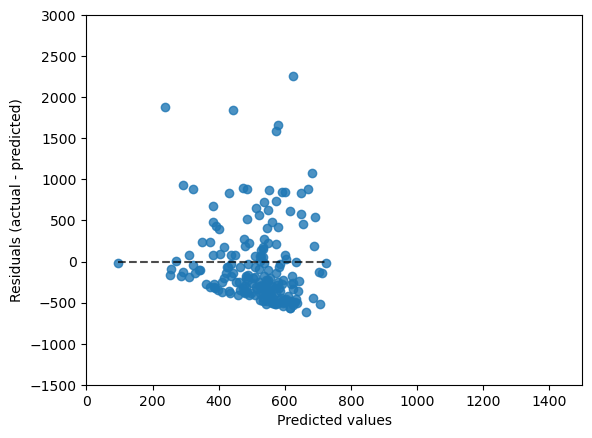

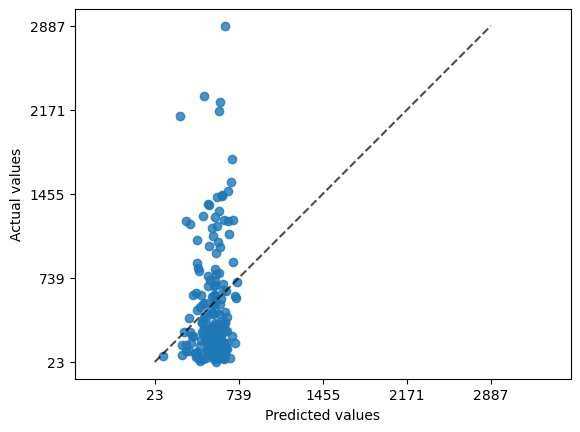

In [46]:
from sklearn.metrics import PredictionErrorDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
PredictionErrorDisplay.from_estimator(reg, X_test, y_test,
kind="residual_vs_predicted")
plt.ylim([-1500, 3000])
plt.xlim([0, 1500])
PredictionErrorDisplay.from_predictions(y_true=y_test, y_pred=y_pred,
kind="actual_vs_predicted")

